# Project Name: EmpathAI - AI for Mental Wellness

Team Members Names: Debankitha Basu, Shreevidhya Shambanna, Ziyang Song

**Project Overview:**

Our project aims to develop a mental health chatbot that assists users by providing support and information on common mental health issues. Utilizing natural language processing (NLP) and machine learning (ML), the chatbot will interact with users in a conversational manner, understanding their concerns and offering guidance or resources.


**Data Sources:** [MentalHealthChat Dataset by Hizardev](https://huggingface.co/datasets/hizardev/MentalHealthChat)

**Other Data Sources:** [MentalHealthChat Datasets from huggingface](https://huggingface.co/datasets?sort=trending&search=mental)

#### Given dataset is already preprocessed for BERT (input_ids, token_type_ids, attention_mask), we can use these embeddings to derive sentence embeddings from them, which represent each text entry as a vector.

####**Step 1: Calculate Sentence Embeddings**
####To derive sentence embeddings from BERT's output, we  average the last hidden states of the model across all tokens, resulting in a single vector representation for each text entry, known as "pooling".

#### **Clustering the Embeddings with K-Means**

In [ ]:
from sklearn.cluster import KMeans

k = 10

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(all_embeddings)

# Cluster labels are now associated with each embedding

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


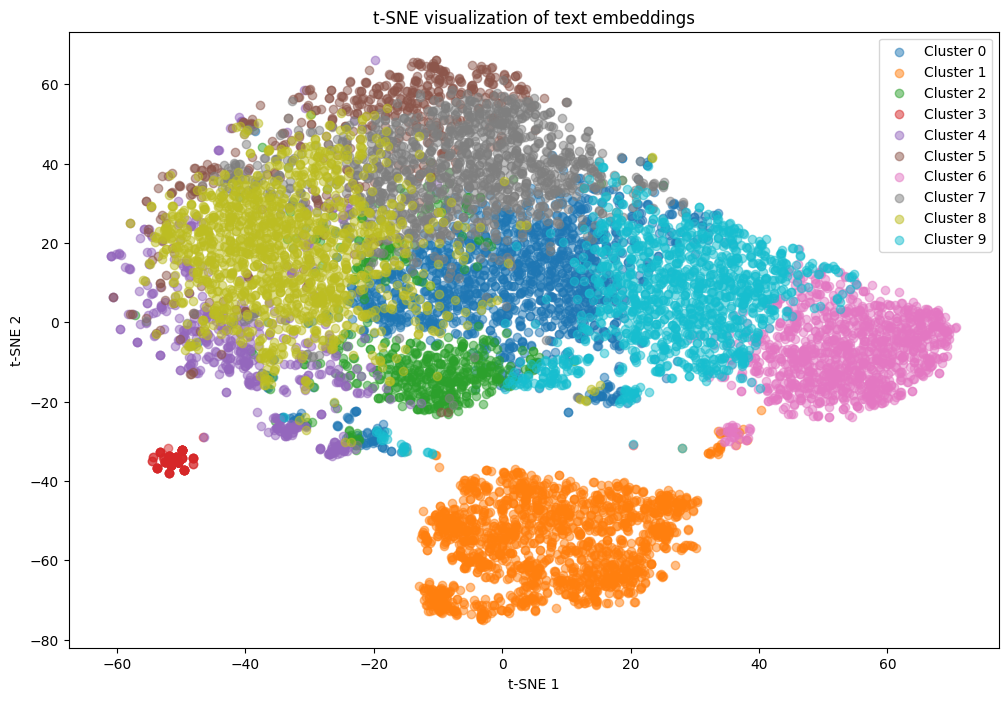

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducing the dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(all_embeddings)

# Plotting the results
plt.figure(figsize=(12, 8))
for i in range(k):
    indices = cluster_labels == i
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=f"Cluster {i}", alpha=0.5)
plt.legend()
plt.title("t-SNE visualization of text embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


In [ ]:
# Extract 'preprocessed_text' from the dataset
texts = sampled_dataset['preprocessed_text']

for i in range(k):
    print(f"\nCluster {i}:")
    cluster_indices = np.where(cluster_labels == i)[0]
    for index in cluster_indices[:5]:  # Just showing a few samples per cluster for brevity
        print(texts[index])


Cluster 0:
i know this is stupid whining about how i have horrible luck with girls but the truth is it has really taken a toll on my confidence i can t for the life of me figure out what i am doing wrong i have talked to a lot of people for relationship advice and they all say the same thing to be myself and spend time with them i do that but get rejected every time i think one of the problems is that i have been told i m handsome for my entire life by men and women but i let it get to my head and now i think i m the shit i also think that it might be the fact that i m super introverted other than a few close friends i never really talked to many people i have very little social skills and it takes so much effort to make small talk i know that this shouldn t be an issue but i don t know where else to talk about this any support is greatly appreciated
hey everyone i m kinda new to talking about this type of thing online but i ve been struggling with bpd for a while what seems to be a l

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette = silhouette_score(all_embeddings, cluster_labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.13713433


The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The value of the silhouette score ranges from -1 to 1, where:

The silhouette score is 0.13, which is a positive value but closer to 0. This suggests that, on average, the objects are not very strongly matched to their own clusters, and there is some overlap between clusters. The clustering is not highly distinct, and there might be room for improvement in the clustering algorithm or the features used for clustering.

